In [41]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


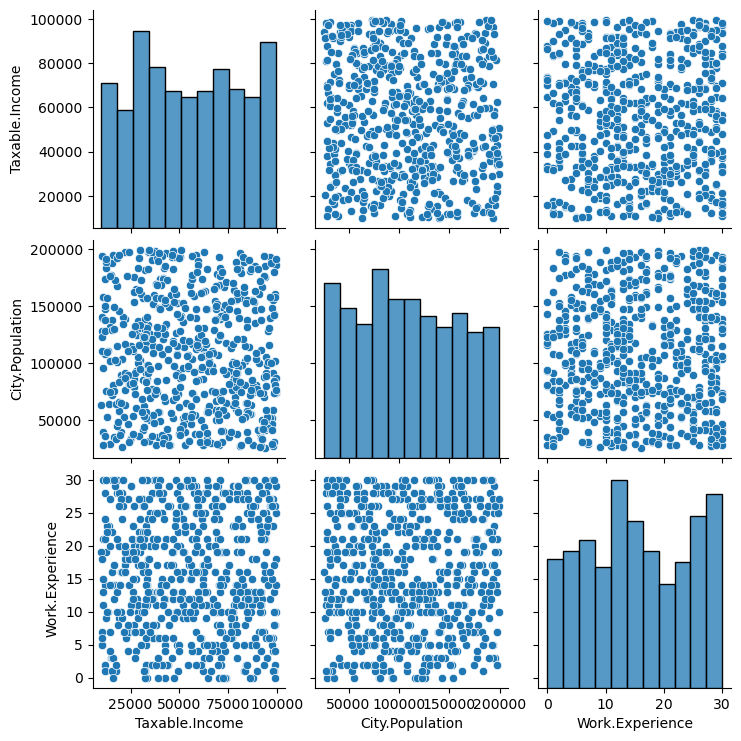

In [30]:
sns.pairplot(fraud)

In [31]:
fraud.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [32]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Preprocessing

In [33]:
label_encoder=preprocessing.LabelEncoder()
fraud['Undergrad']=label_encoder.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=label_encoder.fit_transform(fraud['Marital.Status'])
fraud['Urban']=label_encoder.fit_transform(fraud['Urban'])

# Splitting the data

In [34]:
x=fraud.iloc[:,[0,1,2,3,4,5]]
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [36]:
y=fraud[['Taxable.Income']]
y

,Taxable.Income
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


# Feature Engineering

In [42]:
y['tax']=['risky' if x<= 30000 else 'good' for x in y['Taxable.Income']]

KeyError: 'Taxable.Income'

In [38]:
y=y.drop(['Taxable.Income'],axis=1)
y

,tax
0,good
1,good
2,good
3,good
4,good
...,...
595,good
596,good
597,good
598,good


In [40]:
y.head(50)

,tax
0,good
1,good
2,good
3,good
4,good
5,good
6,good
7,good
8,good
9,good


# Splitting into training and testing

In [57]:
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [58]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

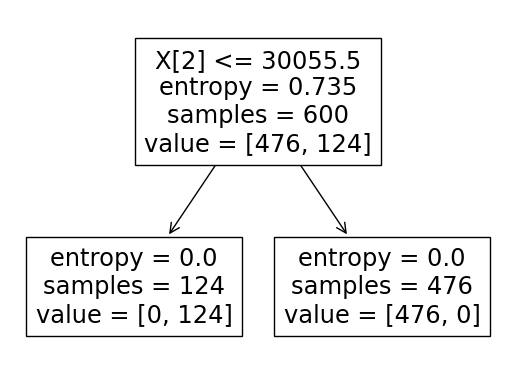

In [59]:
tree.plot_tree(model);

In [46]:
model.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [47]:
fi=pd.DataFrame({'feature':list(x_train.columns),
                'importance':model.feature_importances_}).\
                 sort_values('importance',ascending=False)

In [48]:
fi

,feature,importance
2,Taxable.Income,1.0
0,Undergrad,0.0
1,Marital.Status,0.0
3,City.Population,0.0
4,Work.Experience,0.0
5,Urban,0.0


In [49]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)
model_gini.fit(x,y)

DecisionTreeClassifier(max_depth=3)

In [50]:
model_gini.feature_importances_

array([0., 0., 1., 0., 0., 0.])

In [51]:
fi=pd.DataFrame({'feature':list(x_train.columns),
                'importance':model_gini.feature_importances_}).\
                    sort_values('importance',ascending=False)

In [52]:
fi

,feature,importance
2,Taxable.Income,1.0
0,Undergrad,0.0
1,Marital.Status,0.0
3,City.Population,0.0
4,Work.Experience,0.0
5,Urban,0.0


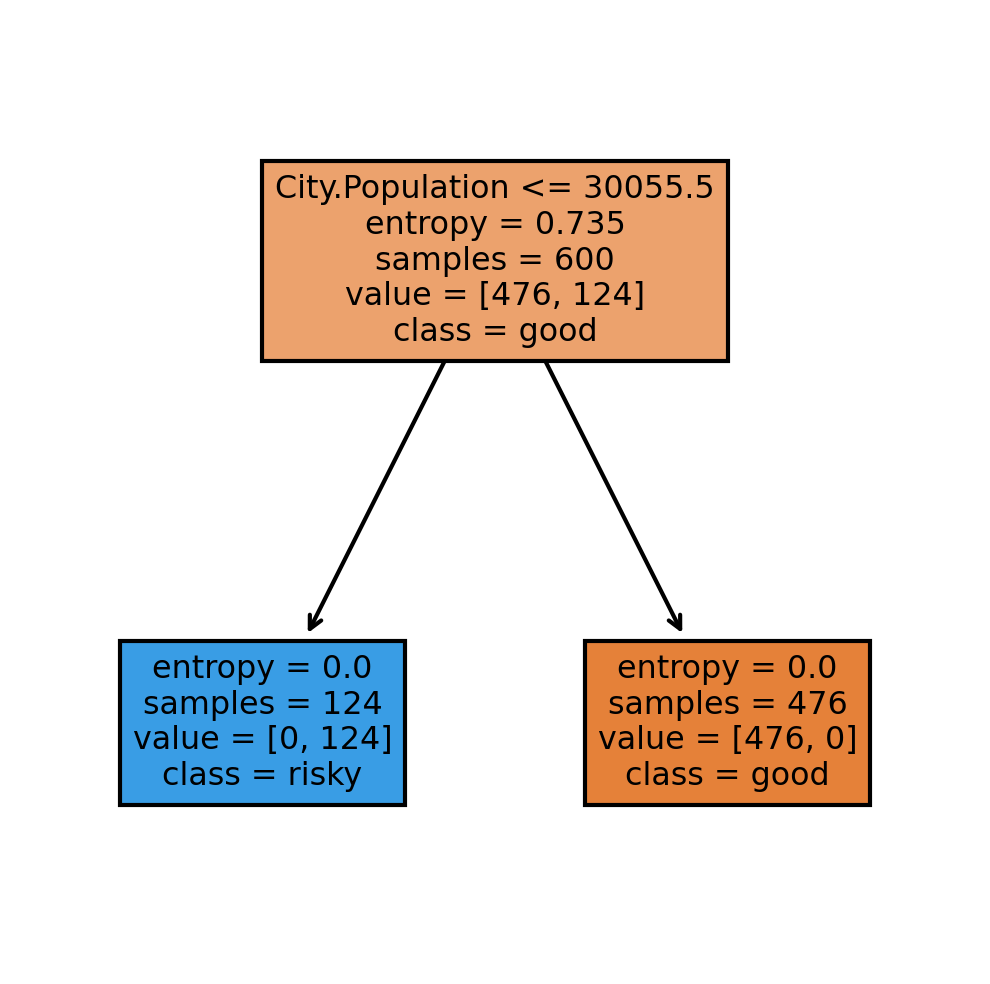

In [56]:
fn=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']
cn=['good','risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);